# VGG19
## Import library

In [146]:
import os
import time
import platform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import chain
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.vgg19
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import initializers, Model
from tensorflow.keras import regularizers

## Function definitions

In [147]:
def build_fileDatabases(data_dir):
    os.chdir(data_dir)
    fileDatabases = []
    classNames = []

    for dirpath,dirnames ,filenames in os.walk(data_dir):        
        if filenames:     
            if platform.system() == "Linux":
                path = dirpath.split('/')
            else:
                path = dirpath.split('\\')
        else:
            continue
    
        if path[-3][0] == '#': #Nazwy folderów poprzedzone znakime # nie będą zawarte w bazie danych
            #print('contains #')
            continue
    
        for i in range(len(path)):
            if path[i] == 'Left':# or path[i] == 'Right':
                className = path[i-2]
                classNames.append(className)
    
                filenames_images = []
    
                for i in range(len(filenames)):
                    if filenames[i][-3:] == 'jpg':              
                        filenames_images.append(os.path.join(dirpath,filenames[i]))
    
                fileDatabases.append(filenames_images) 

    classNumber = len(set(classNames))
    classDict = dict(zip(set(classNames),range(classNumber)))
    print('Słownik obiektów: \n',classDict)
    return fileDatabases, classDict, classNames

def read_images(fileDatabases, img_width, img_height):
    data = []  
    for i in range(len(fileDatabases)):
        data.append([])
        for j in range(len(fileDatabases[i])): 
            image = load_img(fileDatabases[i][j], target_size=(img_height, img_width))
            image = img_to_array(image)
            image = tensorflow.keras.applications.vgg19.preprocess_input(image)
            data[i].append(image)
                
    return data

def build_input_data(data, classDict, classNames, test_size,random_state):
    trainX = [] 
    trainY = []    
    #valX = [] 
    #valY = []     
    testX = [] 
    testY = []     
  
    for i in range(len(data)): 
        
        labels = []
        
        for j in range(len(data[i])):
            labels.append(classNames[i])
        
        (trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(data[i], labels,
     	test_size=test_size, random_state=random_state)
        testX.append(testX_temp)
        testY.append(testY_temp)
        
        #(trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(trainX_temp, trainY_temp,
     	#test_size=valid_size, random_state=random_state) 
        
        #valX.append(testX_temp)
        #valY.append(testY_temp)
        
        trainX.append(trainX_temp)
        trainY.append(trainY_temp)
        
    trainX = list(chain.from_iterable(trainX)) 
    #valX = list(chain.from_iterable(valX))
    testX = list(chain.from_iterable(testX))
    
    trainY_long = []
    #valY_long = []
    testY_long = []
    
    for i in range(len(trainY)):
        for j in range(len(trainY[i])):
            trainY_long.append(classDict.get(trainY[i][j]))
            
    #for i in range(len(valY)):
    #    for j in range(len(valY[i])):
    #        valY_long.append(classDict.get(valY[i][j]))
            
    for i in range(len(testY)):
        for j in range(len(testY[i])):
            testY_long.append(classDict.get(testY[i][j]))
            
    trainX = np.array(trainX, dtype="float")
    print('Number of images in train set: {}'.format(trainX.shape[0]))
    #valX = np.array(valX, dtype="float")
    #print('Number of images in  validation set: {}'.format(valX.shape[0]))
    testX = np.array(testX, dtype="float")
    print('Number of images in test set: {}'.format(testX.shape[0]))
    trainY = np.array(trainY_long)
    print('Number of labels in train set: {}'.format(trainY.shape[0]))
    #valY = np.array(valY_long)
    #print('Number of labels in validation set: {}'.format(valY.shape[0]))
    testY = np.array(testY_long)
    print('Number of labels in test set: {}'.format(testY.shape[0]))
    
    trainY_cat = to_categorical(trainY)
    #valY_cat = to_categorical(valY)
    testY_cat = to_categorical(testY)
    
    return trainX, testX, trainY_cat, testY_cat # valX, , valY_cat                        

## Path creation

In [148]:
if platform.system() == "Linux":
    parentDir = "/home/cv/Models"
    modelsDir = '/home/cv/AlliedRecording1'
else:
    parentDir = "C:\\Users\\stann\\Spyder_projects\\Models"
    modelsDir = 'C:\\AlliedRecording1'

## Training parameters

In [149]:
model_name = "VGG19"
img_height = 224
img_width = 224
batch_size = 32
test_size = 0.2
rotation_range=15
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range=0.1 #0.1
horizontal_flip=True
vertical_flip=True
fill_mode='nearest'
epochs = 200

## Build train / test sets

In [150]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'wentylator': 0, 'plytka': 1, 'Auxxx': 2, 'piny': 3, 'usb': 4, 'cewka': 5, '2xUSB': 6, 'wykladzina': 7, 'zlacze': 8, 'wiatrak': 9, 'wyswietlacz': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


## Model compilaton

In [151]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG19(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False

i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

## Model training

In [152]:
test = 1
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

#loss, accuracy = model.evaluate(trainX,trainY_cat,verbose=1)
#print('Accuracy in train set: {0:5.2f}'.format(accuracy))



Epoch 1/200
100/100 [==============================] - 22s 218ms/step - loss: 1.8944 - accuracy: 0.5287 - val_loss: 1.0554 - val_accuracy: 0.6813
Epoch 2/200
100/100 [==============================] - 21s 211ms/step - loss: 0.7354 - accuracy: 0.7525 - val_loss: 0.4953 - val_accuracy: 0.8309
Epoch 3/200
100/100 [==============================] - 21s 211ms/step - loss: 0.4962 - accuracy: 0.8307 - val_loss: 0.4272 - val_accuracy: 0.8589
Epoch 4/200
100/100 [==============================] - 21s 212ms/step - loss: 0.4502 - accuracy: 0.8610 - val_loss: 0.4412 - val_accuracy: 0.8613
Epoch 5/200
100/100 [==============================] - 21s 211ms/step - loss: 0.3443 - accuracy: 0.8843 - val_loss: 0.3368 - val_accuracy: 0.8990
Epoch 6/200
100/100 [==============================] - 21s 211ms/step - loss: 0.3138 - accuracy: 0.8922 - val_loss: 0.2721 - val_accuracy: 0.9063
Epoch 7/200
100/100 [==============================] - 21s 212ms/step - loss: 0.2624 - accuracy: 0.9117 - val_loss: 0.2993 -

Epoch 57/200
100/100 [==============================] - 21s 210ms/step - loss: 0.0868 - accuracy: 0.9704 - val_loss: 0.2404 - val_accuracy: 0.9453
Epoch 58/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0862 - accuracy: 0.9716 - val_loss: 0.1818 - val_accuracy: 0.9635
Epoch 59/200
100/100 [==============================] - 21s 210ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.1469 - val_accuracy: 0.9599
Epoch 60/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.1646 - val_accuracy: 0.9635
Epoch 61/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0730 - accuracy: 0.9789 - val_loss: 0.2731 - val_accuracy: 0.9489
Epoch 62/200
100/100 [==============================] - 21s 211ms/step - loss: 0.2125 - accuracy: 0.9571 - val_loss: 0.2593 - val_accuracy: 0.9501
Epoch 63/200
100/100 [==============================] - 21s 211ms/step - loss: 0.1514 - accuracy: 0.9647 - val_loss: 0

100/100 [==============================] - 21s 211ms/step - loss: 0.0270 - accuracy: 0.9899 - val_loss: 0.1385 - val_accuracy: 0.9720
Epoch 168/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.1795 - val_accuracy: 0.9696
Epoch 169/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0980 - val_accuracy: 0.9805
Epoch 170/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.1498 - val_accuracy: 0.9720
Epoch 171/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0286 - accuracy: 0.9918 - val_loss: 0.1562 - val_accuracy: 0.9659
Epoch 172/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.1701 - val_accuracy: 0.9672
Epoch 173/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.1323 -

## Model accuracy

In [153]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 76ms/step - loss: 0.0945 - accuracy: 0.9781
Accuracy in test set: 0.9781
Execution time: 8.524115800857544


## Learning curves

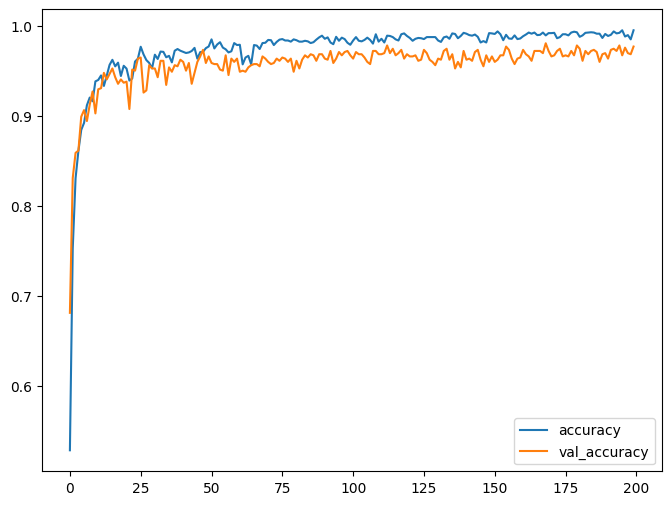

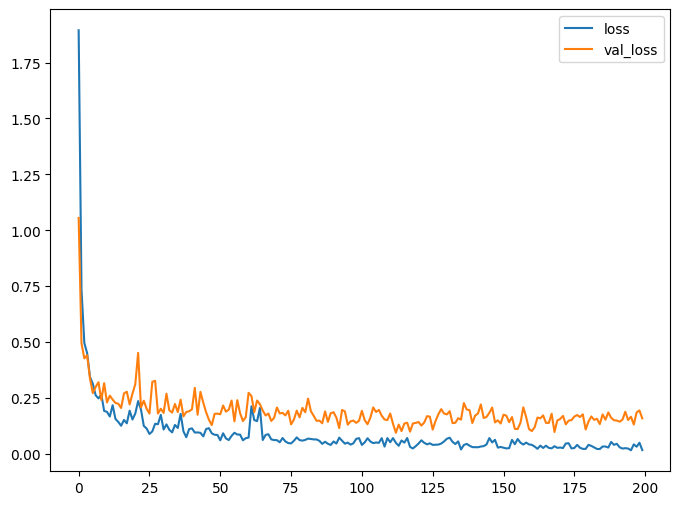

In [154]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

## Confusion matrix

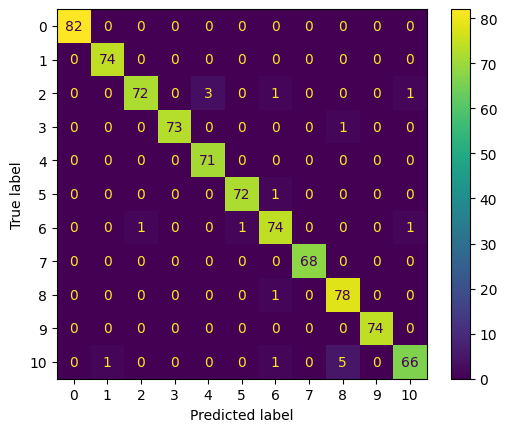

In [155]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 2

In [156]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'wentylator': 0, 'plytka': 1, 'Auxxx': 2, 'piny': 3, 'usb': 4, 'cewka': 5, '2xUSB': 6, 'wykladzina': 7, 'zlacze': 8, 'wiatrak': 9, 'wyswietlacz': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [157]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG19(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False

i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [158]:
test = 2
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 23s 217ms/step - loss: 1.8946 - accuracy: 0.4455 - val_loss: 1.0838 - val_accuracy: 0.6034
Epoch 2/200
100/100 [==============================] - 21s 213ms/step - loss: 0.8933 - accuracy: 0.6731 - val_loss: 0.6689 - val_accuracy: 0.7628
Epoch 3/200
100/100 [==============================] - 21s 213ms/step - loss: 0.6348 - accuracy: 0.7705 - val_loss: 0.5119 - val_accuracy: 0.8139
Epoch 4/200
100/100 [==============================] - 21s 214ms/step - loss: 0.5059 - accuracy: 0.8168 - val_loss: 0.4414 - val_accuracy: 0.8552
Epoch 5/200
100/100 [==============================] - 21s 213ms/step - loss: 0.4009 - accuracy: 0.8625 - val_loss: 0.4018 - val_accuracy: 0.8589
Epoch 6/200
100/100 [==============================] - 21s 213ms/step - loss: 0.3805 - accuracy: 0.8723 - val_loss: 0.4890 - val_accuracy: 0.8650
Epoch 7/200
100/100 [==============================] - 21s 214ms/step - loss: 0.3302 - accuracy: 0.8875 - val_loss: 0.3378 -

Epoch 112/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0648 - accuracy: 0.9820 - val_loss: 0.2324 - val_accuracy: 0.9562
Epoch 113/200
100/100 [==============================] - 21s 214ms/step - loss: 0.0776 - accuracy: 0.9798 - val_loss: 0.1879 - val_accuracy: 0.9562
Epoch 114/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0718 - accuracy: 0.9789 - val_loss: 0.2588 - val_accuracy: 0.9526
Epoch 115/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0719 - accuracy: 0.9839 - val_loss: 0.2090 - val_accuracy: 0.9586
Epoch 116/200
100/100 [==============================] - 21s 214ms/step - loss: 0.0600 - accuracy: 0.9823 - val_loss: 0.1800 - val_accuracy: 0.9562
Epoch 117/200
100/100 [==============================] - 21s 215ms/step - loss: 0.0813 - accuracy: 0.9798 - val_loss: 0.1861 - val_accuracy: 0.9611
Epoch 118/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0555 - accuracy: 0.9830 - val_

In [159]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 76ms/step - loss: 0.1031 - accuracy: 0.9720
Accuracy in test set: 0.9720
Execution time: 8.531732559204102


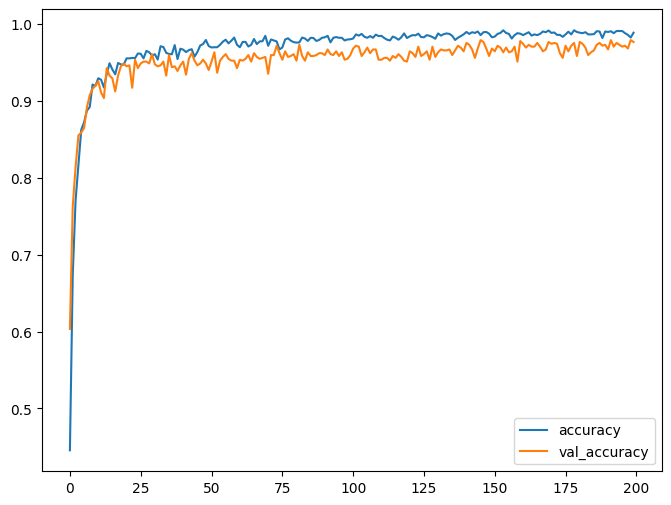

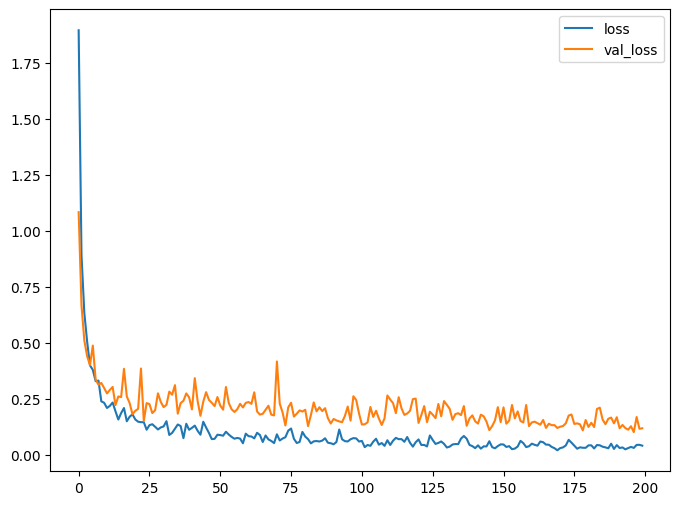

In [160]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

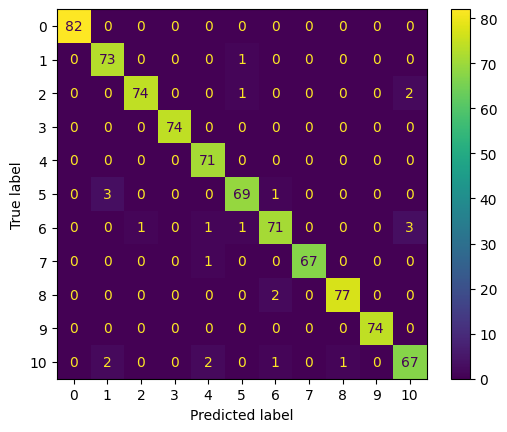

In [161]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 3

In [162]:
random_state = 100
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'wentylator': 0, 'plytka': 1, 'Auxxx': 2, 'piny': 3, 'usb': 4, 'cewka': 5, '2xUSB': 6, 'wykladzina': 7, 'zlacze': 8, 'wiatrak': 9, 'wyswietlacz': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [163]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG19(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False

i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [164]:
test = 3
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 22s 217ms/step - loss: 1.5246 - accuracy: 0.5747 - val_loss: 0.7172 - val_accuracy: 0.7457
Epoch 2/200
100/100 [==============================] - 21s 212ms/step - loss: 0.6898 - accuracy: 0.7582 - val_loss: 0.5193 - val_accuracy: 0.8370
Epoch 3/200
100/100 [==============================] - 21s 213ms/step - loss: 0.5071 - accuracy: 0.8257 - val_loss: 0.4642 - val_accuracy: 0.8516
Epoch 4/200
100/100 [==============================] - 21s 213ms/step - loss: 0.4161 - accuracy: 0.8534 - val_loss: 0.3688 - val_accuracy: 0.8759
Epoch 5/200
100/100 [==============================] - 21s 212ms/step - loss: 0.3839 - accuracy: 0.8761 - val_loss: 0.3390 - val_accuracy: 0.8893
Epoch 6/200
100/100 [==============================] - 21s 212ms/step - loss: 0.3540 - accuracy: 0.8890 - val_loss: 0.3707 - val_accuracy: 0.8759
Epoch 7/200
100/100 [==============================] - 21s 213ms/step - loss: 0.2779 - accuracy: 0.9016 - val_loss: 0.3435 -

Epoch 57/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0765 - accuracy: 0.9795 - val_loss: 0.1828 - val_accuracy: 0.9562
Epoch 58/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0757 - accuracy: 0.9782 - val_loss: 0.2323 - val_accuracy: 0.9513
Epoch 59/200
100/100 [==============================] - 21s 212ms/step - loss: 0.1316 - accuracy: 0.9723 - val_loss: 0.3082 - val_accuracy: 0.9586
Epoch 60/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0673 - accuracy: 0.9764 - val_loss: 0.1326 - val_accuracy: 0.9623
Epoch 61/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0769 - accuracy: 0.9745 - val_loss: 0.1919 - val_accuracy: 0.9550
Epoch 62/200
100/100 [==============================] - 21s 212ms/step - loss: 0.1062 - accuracy: 0.9729 - val_loss: 0.2083 - val_accuracy: 0.9550
Epoch 63/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0590 - accuracy: 0.9808 - val_loss: 0

100/100 [==============================] - 21s 214ms/step - loss: 0.0328 - accuracy: 0.9868 - val_loss: 0.1702 - val_accuracy: 0.9659
Epoch 168/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.1420 - val_accuracy: 0.9732
Epoch 169/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.2014 - val_accuracy: 0.9562
Epoch 170/200
100/100 [==============================] - 21s 213ms/step - loss: 0.0400 - accuracy: 0.9902 - val_loss: 0.1107 - val_accuracy: 0.9672
Epoch 171/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0304 - accuracy: 0.9918 - val_loss: 0.1167 - val_accuracy: 0.9672
Epoch 172/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.2191 - val_accuracy: 0.9489
Epoch 173/200
100/100 [==============================] - 21s 212ms/step - loss: 0.0224 - accuracy: 0.9905 - val_loss: 0.1389 -

In [165]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 77ms/step - loss: 0.0934 - accuracy: 0.9684
Accuracy in test set: 0.9684
Execution time: 8.33876919746399


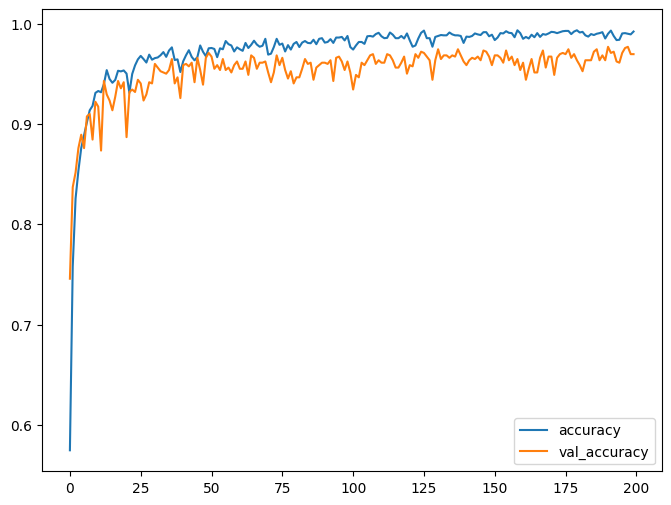

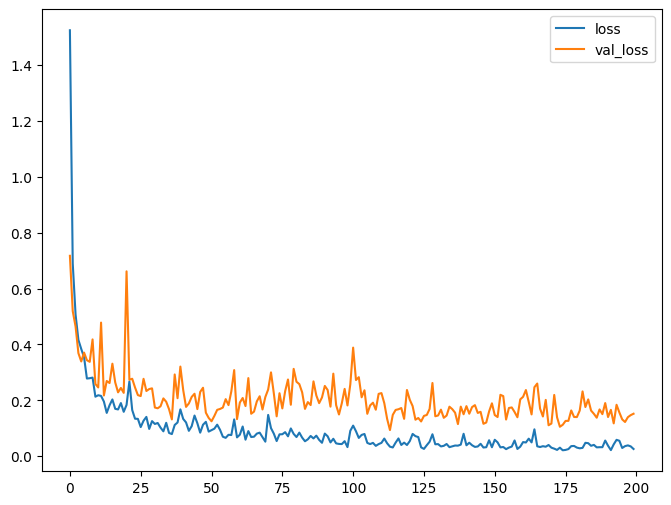

In [166]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

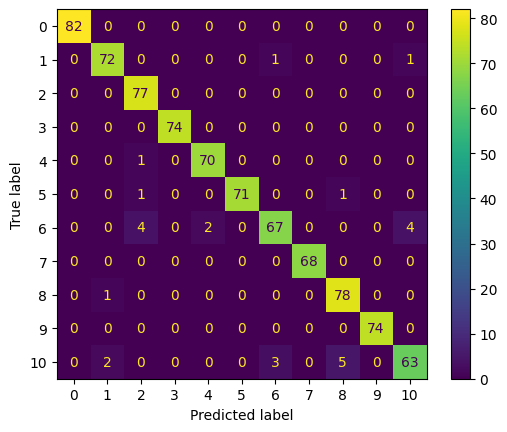

In [167]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)